<a href="https://colab.research.google.com/github/mcasivaram/Datascience/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import  r2_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')
from xgboost import XGBRegressor


In [2]:
data=pd.read_csv("/content/train-chennai-sale (1).csv")
df1=pd.DataFrame(data)



In [3]:
df1.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [4]:
df1.shape

(7109, 22)

In [5]:
df1.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [6]:
df1.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [7]:
df1.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [8]:
df1.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [9]:
df1.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


## DATA CLEANING
## **1ST COLUMN --> PRT_ID**

In [10]:
df1=df1.drop('PRT_ID',axis=1)

In [11]:
df1.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

PRT_ID column has a unique identity values so we can drop it



## **2nd COLUMN --> AREA**

In [12]:
df1.AREA.values

array(['Karapakkam', 'Anna Nagar', 'Adyar', ..., 'Velachery',
       'Karapakkam', 'Velachery'], dtype=object)

In [13]:
df1.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [14]:
df1['AREA']=df1['AREA'].replace(['Karapakam','Anna Nagarr','Ana Nagar','Ann Nagar','Adyr','Velchery','Chrompt','Chrmpet','KKNagar','TNagar','Chormpet'],['Karapakkam','Anna Nagar','Anna Nagar','Anna Nagar','Adyar','Velachery','Chrompet','Chrompet','KK Nagar','T Nagar','Chrompet'])

In [15]:
df1.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In Area column we have corrected some spelling mistake

## **3RD COLUMN --> INT_SQFT**

In [16]:
df1.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

CALCULATING IQR AND MINMAX VALUE:

In [17]:
p75=df1['INT_SQFT'].quantile(0.75)
p25=df1['INT_SQFT'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
print("Minimum value is :",p25-1.5*iqr)
print("Maximum value is :",p75+1.5*iqr)

IQR is : 751.0
Minimum value is : -133.5
Maximum value is : 2870.5


## **4th AND 11th COLUMN --> DATE_SALE, DATE_BUILD**
## **CALCULATING AGE OF THE HOUSE**

In [18]:
df1['DATE_SALE'].values[0]

'04-05-2011'

In [19]:
df1['DATE_SALE']=pd.to_datetime(df1['DATE_SALE'])
df1['DATE_BUILD']=df1['DATE_BUILD'].astype('datetime64[ns]')

In [20]:
df1.dtypes

AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM               float64
N_BATHROOM              float64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [21]:
AGE=df1['DATE_SALE']-df1['DATE_BUILD']
AGE

0      16031 days
1       4015 days
2       7152 days
3       8030 days
4      10802 days
          ...    
7104   17942 days
7105    3196 days
7106   10455 days
7107   11443 days
7108   16060 days
Length: 7109, dtype: timedelta64[ns]

In [22]:
df1=pd.concat([df1,AGE.rename('BUILDING_AGE')],axis=1)

In [23]:
df1.drop(['DATE_BUILD','DATE_SALE'],axis=1,inplace=True)

In [24]:
df1['BUILDING_AGE'].astype('timedelta64[D]')

0       16031.0
1        4015.0
2        7152.0
3        8030.0
4       10802.0
         ...   
7104    17942.0
7105     3196.0
7106    10455.0
7107    11443.0
7108    16060.0
Name: BUILDING_AGE, Length: 7109, dtype: float64

In [25]:
df1['BUILDING_AGE'].dt.days

0       16031
1        4015
2        7152
3        8030
4       10802
        ...  
7104    17942
7105     3196
7106    10455
7107    11443
7108    16060
Name: BUILDING_AGE, Length: 7109, dtype: int64

In [26]:
df1['BUILDING_AGE']=df1['BUILDING_AGE'].dt.days

In [27]:
df1.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
BUILDING_AGE       int64
dtype: object

We have changed the date formate for DATE_BUILD and DATE_SOLD and also we have created a new feature as BUILDING_AGE by using the difference between DATE_SOLD and DATE_BUILD

## **5th COLUMN --> DIST_MAINROAD**

In [28]:
df1['DIST_MAINROAD'].describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

CALCULATING IQR AND MINMAX VALUE

In [29]:
p75=df1['DIST_MAINROAD'].quantile(0.75)
p25=df1['DIST_MAINROAD'].quantile(0.25)
iqr=p75-p25
print("IQR is :",iqr)
print("Minimum value is :",p25-1.5*iqr)
print("Maximum value is :",p75+1.5*iqr)

IQR is : 98.0
Minimum value is : -97.0
Maximum value is : 295.0


## **6th COLUMN --> N_BEDROOM**

In [30]:
df1['N_BEDROOM'].value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [31]:
df1['N_BEDROOM'].fillna(1,inplace=True)

In [32]:
df1['N_BEDROOM'].unique()

array([1., 2., 3., 4.])

In [33]:
df1['N_BEDROOM']=df1['N_BEDROOM'].astype('int64')

In this feature we have changed the datatype from float to integer and we impute mode to the missing values

## **7th COLUMN --> N_BATHROOM**

In [34]:
df1['N_BATHROOM'].value_counts()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64

In [35]:
df1['N_BATHROOM'].fillna(1,inplace=True)

In [36]:
df1['N_BATHROOM']=df1['N_BATHROOM'].astype('int64')

In this feature we have changed the datatype from float to integer and we impute mode to the missing values

## **8th COLUMN --> N_ROOM**

In [37]:
df1['N_ROOM'].unique()

array([3, 5, 4, 2, 6])

## **9th COLUMN --> SALE_COND**

In [38]:
df1['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [39]:
df1['SALE_COND']=df1['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'])

In [40]:
df1['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In SALE_COND column we have corrected some spelling mistake

## **10th COLUMN --> PARK_FACIL**

In [41]:
df1['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [42]:
df1['PARK_FACIL']=df1['PARK_FACIL'].replace({'Noo':'No'})

In [43]:
df1['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In PARK_FACIL column we have corrected some spelling mistake

## **12th COLUMN --> BUILDTYPE**

In [44]:
df1['BUILDTYPE'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [45]:
df1['BUILDTYPE']=df1['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'])

In [46]:
df1['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In BUILDTYPE column we have corrected some spelling mistake

## **13th COLUMN --> UTILITY_AVAIL**

In [47]:
df1['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [48]:
df1['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [49]:
df1['UTILITY_AVAIL']=df1['UTILITY_AVAIL'].replace(['All Pub','NoSewr '],['AllPub','NoSeWa'])

In [50]:
df1['UTILITY_AVAIL'].value_counts()

NoSeWa    3700
AllPub    1887
ELO       1522
Name: UTILITY_AVAIL, dtype: int64

In UTILITY_AVAIL column we have corrected some spelling mistake

## **14th COLUMN --> STREET**

In [51]:
df1['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [52]:
df1['STREET']=df1['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])

In [53]:
df1['STREET'].value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In STREET column we have corrected some spelling mistake

## **15th COLUMN --> MZZONE**

In [54]:
df1['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [55]:
df1['MZZONE'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

## **16th COLUMN --> QS_ROOMS**

In [56]:
df1['QS_ROOMS'].unique()

array([4. , 4.9, 4.1, 4.7, 3. , 4.5, 3.6, 2.4, 2.9, 3.1, 2.2, 2.1, 4.8,
       3.8, 2.3, 3.5, 4.6, 2.8, 4.2, 3.4, 2.7, 2. , 4.3, 3.9, 2.6, 3.3,
       2.5, 3.7, 3.2, 4.4, 5. ])

In [57]:
df1['QS_ROOMS'].describe()

count    7109.000000
mean        3.517471
std         0.891972
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_ROOMS, dtype: float64

## **17th COLUMN --> QS_BATHROOM**

In [58]:
df1['QS_BATHROOM'].unique()

array([3.9, 4.2, 3.8, 2.5, 2.6, 2.1, 4.5, 3.7, 3.1, 3.2, 3.4, 2.2, 4.6,
       4.9, 2.7, 4.4, 5. , 2.8, 3. , 2.9, 3.6, 4. , 4.3, 2. , 3.3, 4.7,
       2.3, 4.1, 4.8, 3.5, 2.4])

In [59]:
df1['QS_BATHROOM'].describe()

count    7109.000000
mean        3.507244
std         0.897834
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BATHROOM, dtype: float64

## **18th COLUMN --> QS_BEDROOM**

In [60]:
df1['QS_BEDROOM'].describe()

count    7109.000000
mean        3.485300
std         0.887266
min         2.000000
25%         2.700000
50%         3.500000
75%         4.300000
max         5.000000
Name: QS_BEDROOM, dtype: float64

## **19th COLUMN --> QS_OVERALL**

In [61]:
df1['QS_OVERALL'].isnull().sum()

48

In [62]:
df1['QS_OVERALL'].describe()

count    7061.000000
mean        3.503254
std         0.527223
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [63]:
df1['QS_OVERALL'].fillna(value=df1['QS_OVERALL'].median(),inplace=True)

In [64]:
df1['QS_OVERALL'].isnull().sum()

0

In this feature we have imputed median to the missing values

## **20 AND 21 COLUMN --> REG_FEE AND COMMISSION**

In [65]:
df1.drop(columns='REG_FEE',axis=1,inplace=True)
df1.drop(columns='COMMIS',axis=1,inplace=True)

In [66]:
df1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE'],
      dtype='object')

Both of this REG_FEE and COMMISSION columns are not important to our prediction so we drop it

## **22th COLUMN --> SALES_PRICE**

In [67]:
df1.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING_AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,16031
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,4015
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,7152
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSeWa,Paved,I,4.7,3.9,3.6,4.010,9630290,8030
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,10802


In [68]:
df1.dtypes

AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM          int64
N_BATHROOM         int64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
BUILDING_AGE       int64
dtype: object

In [69]:
df1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE'],
      dtype='object')

## **EXPLORATORY DATA ANALYSIS**

In [70]:
df1.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'BUILDING_AGE'],
      dtype='object')

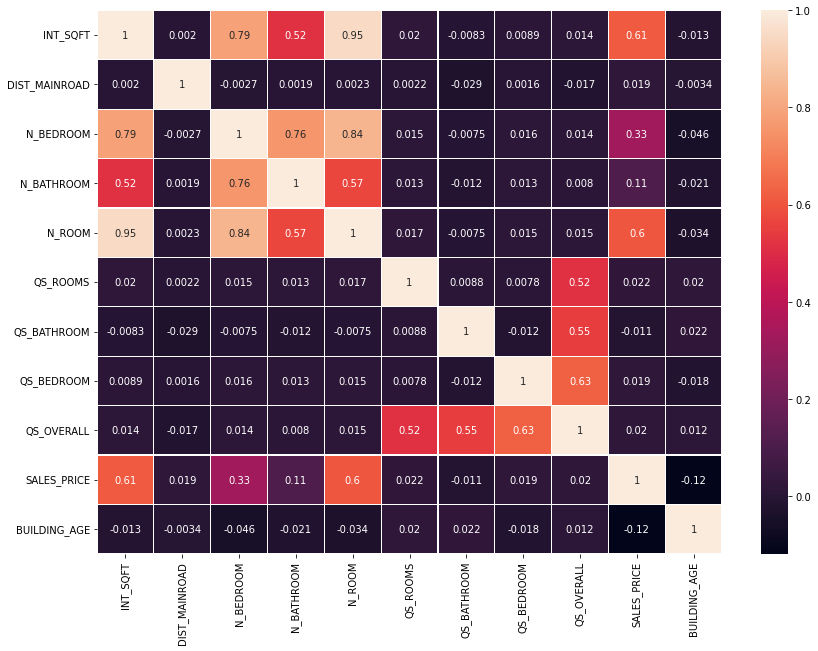

In [71]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(),annot=True,linewidth=0.2)

## **AREA COLUMN**

In [72]:
print("CORRELATION VALUE :\n",df1[['AREA','SALES_PRICE']].corr())

CORRELATION VALUE :
              SALES_PRICE
SALES_PRICE          1.0


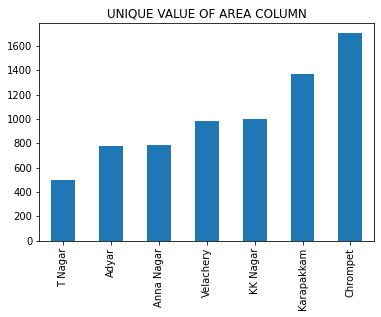

In [73]:
plt.title('UNIQUE VALUE OF AREA COLUMN')
df1.AREA.value_counts().sort_values().plot(kind='bar')

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

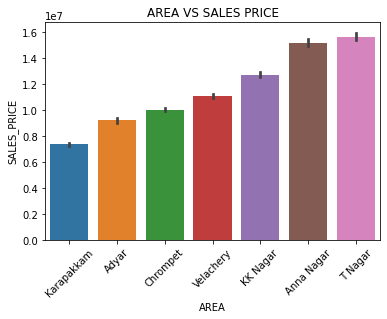

In [74]:
area_order=df1.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x='AREA',y='SALES_PRICE',data=df1,order=area_order)
plt.title('AREA VS SALES PRICE')
plt.xticks(rotation=45)

In [75]:
df1['AREA']=df1['AREA'].map({'Karapakkam':0, 'Adyar':1, 'Chrompet':2, 'Velachery':3,
       'KK Nagar':4, 'Anna Nagar':5, 'T Nagar':6})



Area has a linear relationship.it has a order so we are doing label encoding.

## **INT_SQFT COLUMN**

In [76]:
print("CORRELATION VALUE :\n",df1[['INT_SQFT','SALES_PRICE']].corr())

CORRELATION VALUE :
              INT_SQFT  SALES_PRICE
INT_SQFT     1.000000     0.612125
SALES_PRICE  0.612125     1.000000


Text(0.5, 1.0, 'DISTRIBUTION OF INT_SQFT COLUMN')

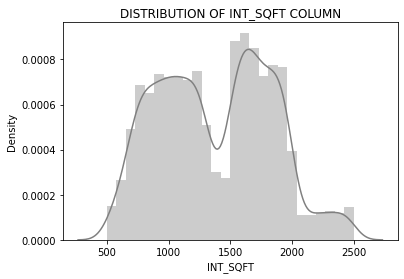

In [77]:
sns.distplot(df1['INT_SQFT'],color='gray')
plt.title("DISTRIBUTION OF INT_SQFT COLUMN")

Text(0.5, 1.0, 'INT_SQFT VS SALES PRICE')

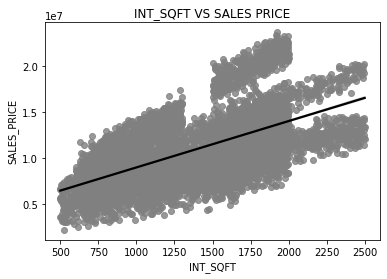

In [78]:
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=df1,scatter_kws={'color':'gray'},line_kws={'color':'black'})
plt.title("INT_SQFT VS SALES PRICE")

We can see the relationship between INT_SQFT and target.sqft increases and also price is increasing.

## **DIST_MAINROAD COLUMN**





In [79]:
print("CORRELATION VALUE :\n",df1[['DIST_MAINROAD','SALES_PRICE']].corr())

CORRELATION VALUE :
                DIST_MAINROAD  SALES_PRICE
DIST_MAINROAD       1.000000     0.018783
SALES_PRICE         0.018783     1.000000


DISTRIBUTION OF DIST_MAINROAD COLUMN


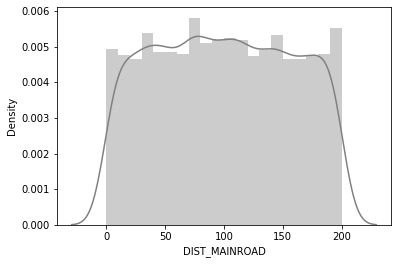

In [80]:
sns.distplot(df1['DIST_MAINROAD'],color='gray')
print("DISTRIBUTION OF DIST_MAINROAD COLUMN")

Text(0.5, 1.0, 'DIST_MAINROAD VS SALES PRICE')

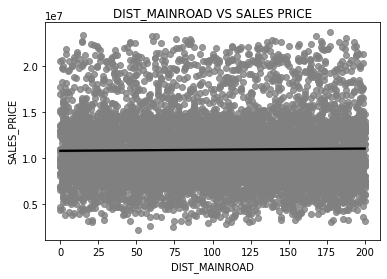

In [81]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=df1,scatter_kws={'color':'gray'},line_kws={'color':'black'})
plt.title("DIST_MAINROAD VS SALES PRICE")

In [82]:
df1.drop(columns=['DIST_MAINROAD'],axis=1,inplace=True)

We can't see any relationship between dis_mainroad and target so we are dropping it.

## **N_BEDROOM COLUMN**

In [83]:
print("CORRELATION VALUE :\n",df1[['N_BEDROOM','SALES_PRICE']].corr())

CORRELATION VALUE :
              N_BEDROOM  SALES_PRICE
N_BEDROOM     1.000000     0.330987
SALES_PRICE   0.330987     1.000000


Text(0.5, 1.0, 'UNIQUE VALUE OF N_BEDROOM COLUMN')

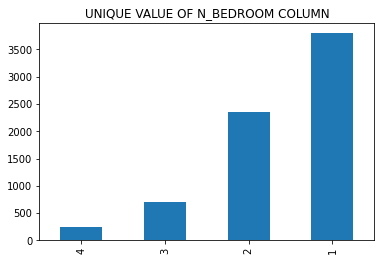

In [84]:
df1.N_BEDROOM.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF N_BEDROOM COLUMN")

Text(0.5, 1.0, 'DISTRIBUTION OF N_BEDROOM COLUMN')

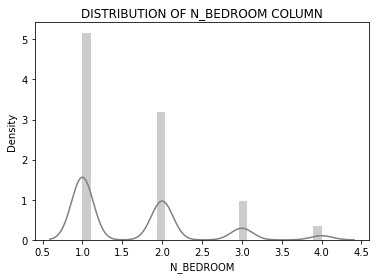

In [85]:
sns.distplot(df1['N_BEDROOM'],color='gray')
plt.title("DISTRIBUTION OF N_BEDROOM COLUMN")

Text(0.5, 1.0, 'N_BEDROOM VS SALES PRICE')

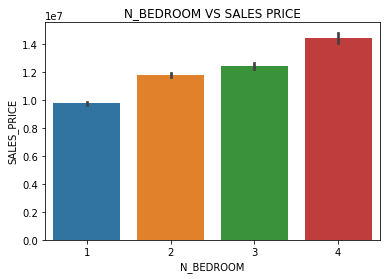

In [86]:
bedroom_order=df1.groupby('N_BEDROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BEDROOM']
sns.barplot(x='N_BEDROOM',y='SALES_PRICE',data=df1,order=bedroom_order)
plt.title("N_BEDROOM VS SALES PRICE")

We can see that one bedroom houses have less price and also more number in data.
Four bedroom houses have higher prices.
N_BEDROOM column has a linear relationship with Sales Price(Target)

## **N_BATHROOM COLUMN**

In [87]:
print("CORRELATION VALUE :\n",df1[['N_BATHROOM','SALES_PRICE']].corr())

CORRELATION VALUE :
              N_BATHROOM  SALES_PRICE
N_BATHROOM     1.000000     0.108834
SALES_PRICE    0.108834     1.000000


Text(0.5, 1.0, 'UNIQUE VALUE OF N_BATHROOM COLUMN')

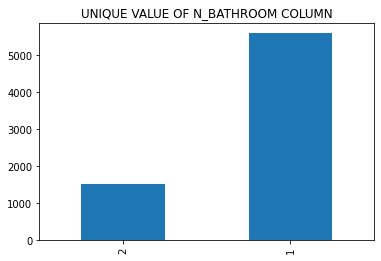

In [88]:
df1.N_BATHROOM.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF N_BATHROOM COLUMN")

Text(0.5, 1.0, 'DISTRIBUTION OF N_BATHROOM COLUMN')

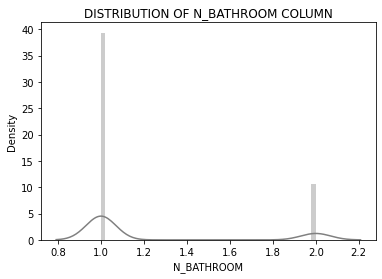

In [89]:
sns.distplot(df1['N_BATHROOM'],color='gray')
plt.title("DISTRIBUTION OF N_BATHROOM COLUMN")

Text(0.5, 1.0, 'N_BATHROOM VS SALES PRICE')

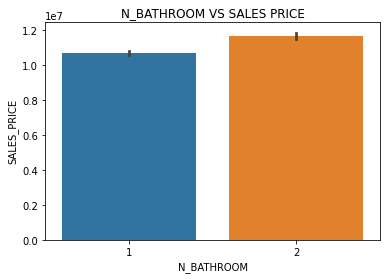

In [90]:
bathroom_order=df1.groupby('N_BATHROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_BATHROOM']
sns.barplot(x='N_BATHROOM',y='SALES_PRICE',data=df1,order=bathroom_order)
plt.title("N_BATHROOM VS SALES PRICE")

We can see that one bathroom houses have less price and also more number in data.
Two bathroom houses have higher prices.
N_BATHROOM column has a linear relationship with Sales Price(Target)

## **N_ROOM**

In [91]:
print("CORRELATION VALUE :\n",df1[['N_ROOM','SALES_PRICE']].corr())

CORRELATION VALUE :
               N_ROOM  SALES_PRICE
N_ROOM       1.00000      0.60276
SALES_PRICE  0.60276      1.00000


Text(0.5, 1.0, 'UNIQUE VALUE OF N_ROOM COLUMN')

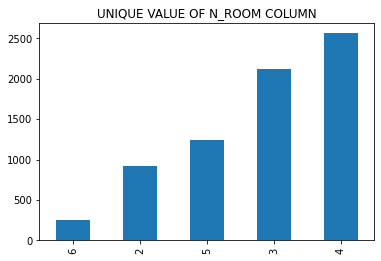

In [92]:
df1.N_ROOM.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF N_ROOM COLUMN")

Text(0.5, 1.0, 'DISTRIBUTION OF N_ROOM COLUMN')

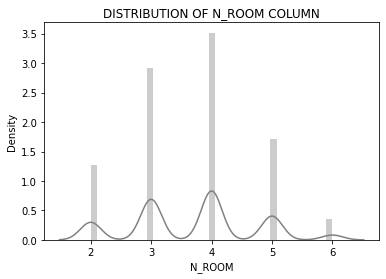

In [93]:
sns.distplot(df1['N_ROOM'],color='gray')
plt.title("DISTRIBUTION OF N_ROOM COLUMN")

Text(0.5, 1.0, 'N_ROOM VS SALES PRICE')

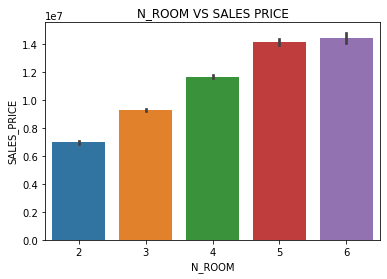

In [94]:
room_order=df1.groupby('N_ROOM')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['N_ROOM']
sns.barplot(x='N_ROOM',y='SALES_PRICE',data=df1,order=room_order)
plt.title("N_ROOM VS SALES PRICE")

We can see that Two room houses have less price and four room houses are more number in data.
Six room houses have higher prices.
N_ROOM column has a linear relationship with Sales Price(Target)

## **SALE_COND**

In [95]:
print("CORRELATION VALUE :\n",df1[['SALE_COND','SALES_PRICE']].corr())

CORRELATION VALUE :
              SALES_PRICE
SALES_PRICE          1.0


Text(0.5, 1.0, 'UNIQUE VALUE OF SALE_COND COLUMN')

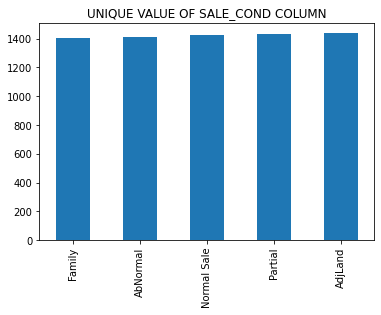

In [96]:
df1.SALE_COND.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF SALE_COND COLUMN")

Text(0.5, 1.0, 'DISTRIBUTION OF INT_SQFT')

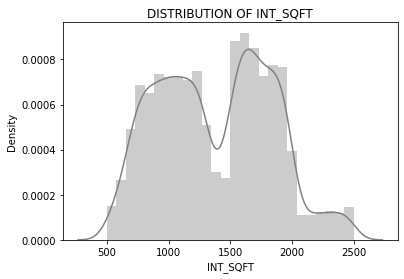

In [97]:
sns.distplot(df1['INT_SQFT'],color='gray')
plt.title("DISTRIBUTION OF INT_SQFT")

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

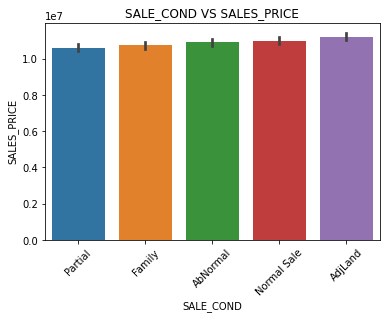

In [98]:
area_order=df1.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=df1,order=area_order)
plt.title("SALE_COND VS SALES_PRICE")
plt.xticks(rotation=45)

In [99]:
df1.drop(columns=['SALE_COND'],axis=1,inplace=True)

Sales Condition categories are equally distributed.
It does not have relationship with target.So we are dropping the column.

## **PARK_FACIL**

In [100]:
print("CORRELATION VALUE :\n",df1[['PARK_FACIL','SALES_PRICE']].corr())

CORRELATION VALUE :
              SALES_PRICE
SALES_PRICE          1.0


Text(0.5, 1.0, 'UNIQUE VALUE OF PARK_FACIL COLUMN')

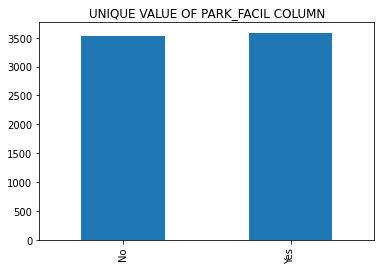

In [101]:
df1.PARK_FACIL.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF PARK_FACIL COLUMN")

Text(0.5, 1.0, 'PARK_FACIL VS SALES PRICE')

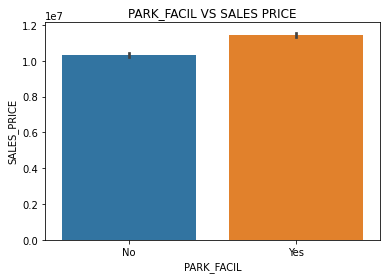

In [102]:
park_order=df1.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df1,order=park_order)
plt.title("PARK_FACIL VS SALES PRICE")

In [103]:
df1['PARK_FACIL']=df1['PARK_FACIL'].map({'No':0,'Yes':1})


Sales price is high for the houses which is having Parking facility.
We are label encoding the values.

## **BUILDTYPE**

In [104]:
print("CORRELATION VALUE :\n",df1[['BUILDTYPE','SALES_PRICE']].corr())

CORRELATION VALUE :
              SALES_PRICE
SALES_PRICE          1.0


Text(0.5, 1.0, 'UNIQUE VALUE OF BUILDTYPE COLUMN')

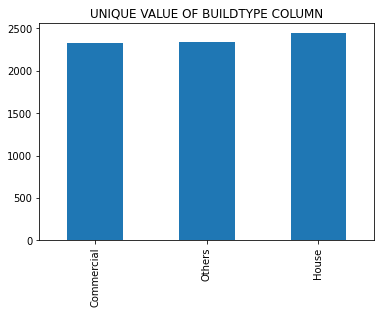

In [105]:
df1.BUILDTYPE.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF BUILDTYPE COLUMN")

Text(0.5, 1.0, 'BUILDTYPE VS SALES PRICE')

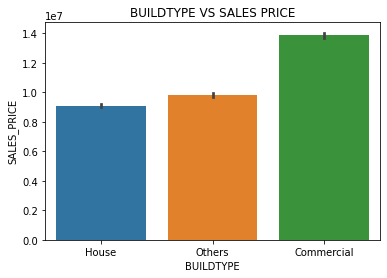

In [106]:
build_order=df1.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df1,order=build_order)
plt.title("BUILDTYPE VS SALES PRICE")

In [107]:
df1=pd.get_dummies(df1,columns=['BUILDTYPE'])


In Build_Type, commercial buildings having higher price than houses.

## **UTILITY_AVAIL**

In [108]:
print("CORRELATION VALUE :\n",df1[['UTILITY_AVAIL','SALES_PRICE']].corr())

CORRELATION VALUE :
              SALES_PRICE
SALES_PRICE          1.0


Text(0.5, 1.0, 'UNIQUE VALUE OF UTILITY_AVAIL COLUMN')

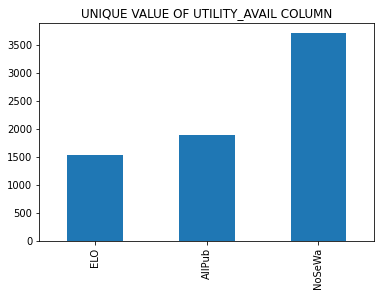

In [109]:
df1.UTILITY_AVAIL.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF UTILITY_AVAIL COLUMN")

Text(0.5, 1.0, 'UTILITY_AVAIL VS SALES PRICE')

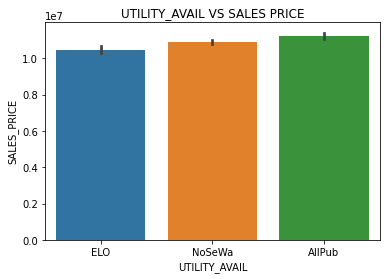

In [110]:
utility_order=df1.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df1,order=utility_order)
plt.title("UTILITY_AVAIL VS SALES PRICE")

In [111]:
df1['UTILITY_AVAIL']=df1['UTILITY_AVAIL'].map({'ELO':0,'NoSeWa':1,'AllPub':2})

Utility_
avail has some linear relationship with target and also we are doing label encoding.

## **STREET**

In [112]:
print("CORRELATION VALUE :\n",df1[['STREET','SALES_PRICE']].corr())

CORRELATION VALUE :
              SALES_PRICE
SALES_PRICE          1.0


Text(0.5, 1.0, 'UNIQUE VALUE OF STREET COLUMN')

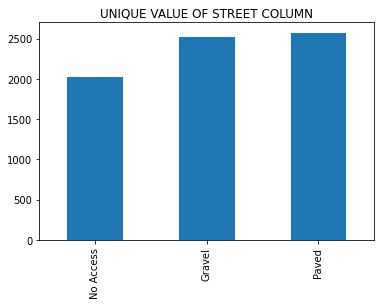

In [113]:
df1.STREET.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF STREET COLUMN")

Text(0.5, 1.0, 'STREET VS SALES PRICE')

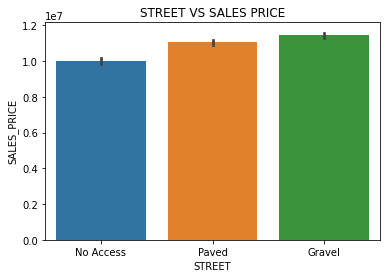

In [114]:
street_order=df1.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=df1,order=street_order)
plt.title("STREET VS SALES PRICE")

In [115]:
df1['STREET']=df1['STREET'].map({'No Access':0,'Paved':1,'Gravel':2})

Gravel street has the higher sales price but not much difference with paved street.
We are doing label encoding.

## **MZZONE**

In [116]:
print("CORRELATION VALUE :\n",df1[['MZZONE','SALES_PRICE']].corr())

CORRELATION VALUE :
              SALES_PRICE
SALES_PRICE          1.0


Text(0.5, 1.0, 'UNIQUE VALUE OF MZZONE COLUMN')

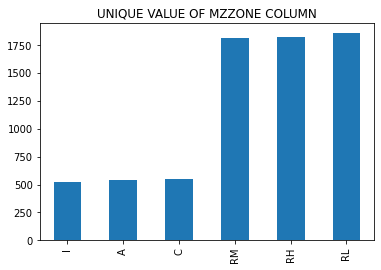

In [117]:
df1.MZZONE.value_counts().sort_values().plot(kind='bar')
plt.title("UNIQUE VALUE OF MZZONE COLUMN")

Text(0.5, 1.0, 'MZZONE VS SALES PRICE')

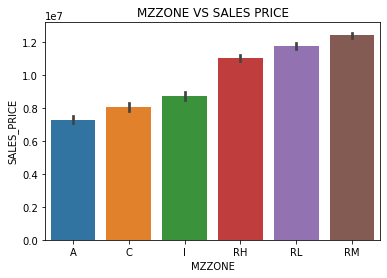

In [118]:
mzzone_order=df1.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df1,order=mzzone_order)
plt.title("MZZONE VS SALES PRICE")

In [119]:
df1['MZZONE']=df1['MZZONE'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})

Residential Medium density has higher price than Agriculture land.
We have implemented Label encoding

## **QS_ROOMS**

In [120]:
print("CORRELATION VALUE :\n",df1[['QS_ROOMS','SALES_PRICE']].corr())

CORRELATION VALUE :
              QS_ROOMS  SALES_PRICE
QS_ROOMS     1.000000     0.021967
SALES_PRICE  0.021967     1.000000


Text(0.5, 1.0, 'DISTRIBUTION OF QS_BATHROOM')

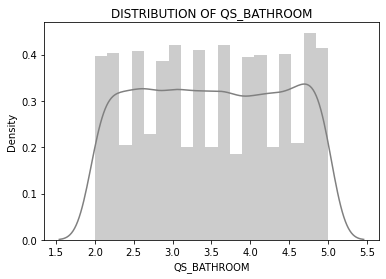

In [121]:
sns.distplot(df1['QS_BATHROOM'],color='gray')
plt.title("DISTRIBUTION OF QS_BATHROOM")

Text(0.5, 1.0, 'QS_ROOMS VS SALES PRICE')

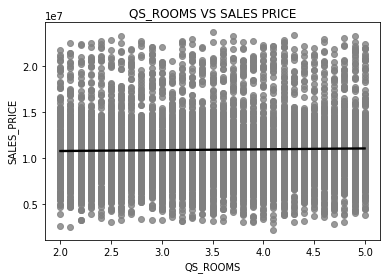

In [122]:
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=df1,scatter_kws={'color':'gray'},line_kws={'color':'black'})
plt.title("QS_ROOMS VS SALES PRICE")

In [123]:
df1.drop(columns=['QS_ROOMS'],axis=1,inplace=True)

There is no relationship so we are dropping the column

## **QS_BATHROOM**

In [124]:
print("CORRELATION VALUE :\n",df1[['QS_BATHROOM','SALES_PRICE']].corr())

CORRELATION VALUE :
              QS_BATHROOM  SALES_PRICE
QS_BATHROOM     1.000000    -0.011377
SALES_PRICE    -0.011377     1.000000


Text(0.5, 1.0, 'DISTRIBUTION OF QS_BATHROOM COLUMN')

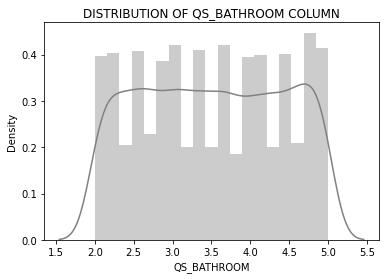

In [125]:
sns.distplot(df1['QS_BATHROOM'],color='gray')
plt.title("DISTRIBUTION OF QS_BATHROOM COLUMN")

Text(0.5, 1.0, 'QS_BATHROOM VS SALES PRICE')

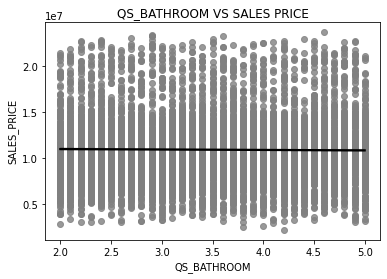

In [126]:
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=df1,scatter_kws={'color':'gray'},line_kws={'color':'black'})
plt.title("QS_BATHROOM VS SALES PRICE")

In [127]:
df1.drop(columns=['QS_BATHROOM'],axis=1,inplace=True)

There is no relationship so we are dropping the column

## **QS_BEDROOM**

In [128]:
print("CORRELATION VALUE :\n",df1[['QS_BEDROOM','SALES_PRICE']].corr())

CORRELATION VALUE :
              QS_BEDROOM  SALES_PRICE
QS_BEDROOM     1.000000     0.018804
SALES_PRICE    0.018804     1.000000


Text(0.5, 1.0, 'DISTRIBUTION OF QS_BEDROOM COLUMN')

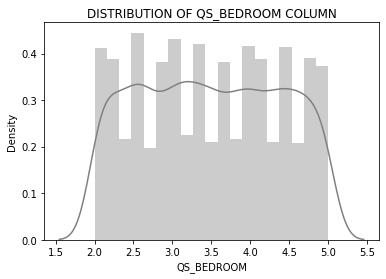

In [129]:
sns.distplot(df1['QS_BEDROOM'],color='gray')
plt.title("DISTRIBUTION OF QS_BEDROOM COLUMN")

Text(0.5, 1.0, 'QS_BEDROOM VS SALESPRICE')

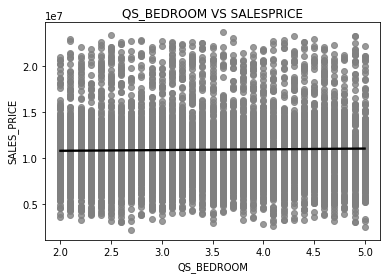

In [130]:
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=df1,scatter_kws={'color':'gray'},line_kws={'color':'black'})
plt.title("QS_BEDROOM VS SALESPRICE")

In [131]:
df1.drop(columns=['QS_BEDROOM'],axis=1,inplace=True)

There is no relationship so we are dropping the column

## **QS_OVERALL**

In [132]:
print("CORRELATION VALUE :\n",df1[['QS_OVERALL','SALES_PRICE']].corr())

CORRELATION VALUE :
              QS_OVERALL  SALES_PRICE
QS_OVERALL     1.000000     0.020474
SALES_PRICE    0.020474     1.000000


Text(0.5, 1.0, 'DISTRIBUTION OF QS_OVERALL COLUMN')

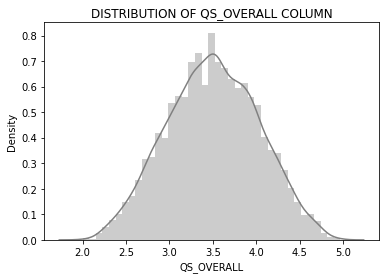

In [133]:
sns.distplot(df1['QS_OVERALL'],color='gray')
plt.title("DISTRIBUTION OF QS_OVERALL COLUMN")

Text(0.5, 1.0, 'QS_OVERALL VS SALES PRICE')

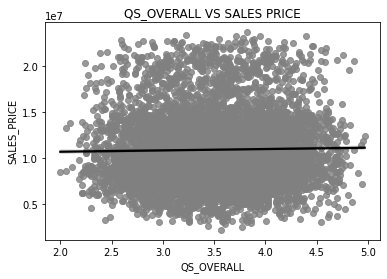

In [134]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=df1,scatter_kws={'color':'gray'},line_kws={'color':'black'})
plt.title("QS_OVERALL VS SALES PRICE")

In [135]:
df1.drop(columns=['QS_OVERALL'],axis=1,inplace=True)

There is no relationship so we are dropping the column

## **BUILDING_AGE**

In [136]:
print("CORRELATION VALUE :\n",df1[['BUILDING_AGE','SALES_PRICE']].corr())

CORRELATION VALUE :
               BUILDING_AGE  SALES_PRICE
BUILDING_AGE      1.000000    -0.119285
SALES_PRICE      -0.119285     1.000000


Text(0.5, 1.0, 'DISTRIBUTION OF BUILDING_AGE COLUMN')

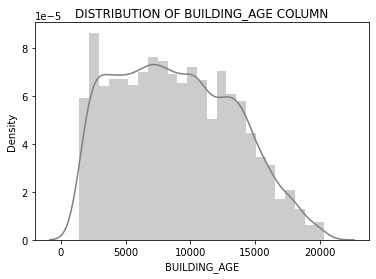

In [137]:
sns.distplot(df1['BUILDING_AGE'],color='gray')
plt.title("DISTRIBUTION OF BUILDING_AGE COLUMN")

Text(0.5, 1.0, 'BUILDING_AGE VS SALES PRICE')

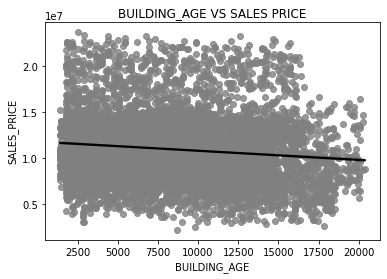

In [138]:
sns.regplot(x='BUILDING_AGE',y='SALES_PRICE',data=df1,scatter_kws={'color':'gray'},line_kws={'color':'black'})
plt.title("BUILDING_AGE VS SALES PRICE")

If age of the house high then sales price of the house is low.
There is some Linear relationship.

## **SPLITTING THE DATASET**

In [139]:
df1.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'BUILDING_AGE',
       'BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],
      dtype='object')

In [140]:
X=df1[['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL','UTILITY_AVAIL', 'STREET', 'MZZONE','BUILDING_AGE','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others']].values
y=df1['SALES_PRICE'].values

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

80 % of the data is splitted into train data.
20% of the data is splitted into test data.

## **SCALING THE DATASET**

In [142]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

## **LINEAR REGRESSION MODEL**

In [143]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [144]:
y_pred = regressor.predict(X_test_scaled)


In [145]:
print('R2 SCORE OF LINEAR REGERSSION ALGORITHM :', metrics.r2_score(y_test,y_pred))

R2 SCORE OF LINEAR REGERSSION ALGORITHM : 0.9198289588162416


In [146]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'PARK_FACIL','UTILITY_AVAIL', 'STREET', 'MZZONE','BUILDING_AGE','BUILDTYPE_Commercial', 'BUILDTYPE_House', 'BUILDTYPE_Others'],selector.support_))

[('AREA', True),
 ('INT_SQFT', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('PARK_FACIL', False),
 ('UTILITY_AVAIL', False),
 ('STREET', False),
 ('MZZONE', True),
 ('BUILDING_AGE', False),
 ('BUILDTYPE_Commercial', True),
 ('BUILDTYPE_House', False),
 ('BUILDTYPE_Others', False)]

We got Area,N_Room,Buildtype_Commercial are the most important features in this prediction.
R2 score is 0.91

## **KNN REGRESSOR MODEL**

In [147]:
knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled,y_test)


for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10))) #predicting using the model


knn = KNeighborsRegressor(3)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

K value  :  1  train score :  1.0  score :  0.9369329278915896
K value  :  2  train score :  0.9846406622782621  score :  0.9479215194279146
K value  :  3  train score :  0.9775932504630834  score :  0.9517512178188398
K value  :  4  train score :  0.9735497499823519  score :  0.951890127546157
K value  :  5  train score :  0.970170978476489  score :  0.9516644521997621
K value  :  6  train score :  0.9675613970611859  score :  0.9514888918635519
K value  :  7  train score :  0.9657620842093703  score :  0.9511131863000475
K value  :  8  train score :  0.9639959703567591  score :  0.949867132423282
K value  :  9  train score :  0.9621158633379777  score :  0.9488975782304271
K value  :  10  train score :  0.9600057728839255  score :  0.9485657525840425
K value  :  20  train score :  0.9489652544920877  score :  0.9404755665743851
K value  :  50  train score :  0.9244883272779655  score :  0.9161531091377613


0.9546899360793719

In [148]:
print("R2 SCORE OF  K-NEAREST NEIGHBORS ALGORITHM :",knn.score(X_test_scaled,y_test))

R2 SCORE OF  K-NEAREST NEIGHBORS ALGORITHM : 0.9546899360793719


In KNN Model, we got R2 score as 95%

## **DECISION TREE REGRESSOR MODEL**

In [149]:
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)
y_pred = dt.predict(X_test_scaled)
rsquared = r2_score(y_test,y_pred)

In [150]:

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeRegressor(max_depth=depth)
  dt.fit(X_train_scaled,y_train)
  trainAccuracy = r2_score(y_train, dt.predict(X_train_scaled)) 
  dt = DecisionTreeRegressor(max_depth=depth)
  valAccuracy = cross_val_score(dt, X_train_scaled, y_train, cv=10, scoring = make_scorer(r2_score))
  print("Depth : ",depth, " Train R2 : ",trainAccuracy, " Val Score : ", np.mean(valAccuracy))

Depth :  1  Train R2 :  0.3599406300044964  Val Score :  0.35669035623321543
Depth :  2  Train R2 :  0.6825449206985352  Val Score :  0.6808977561276365
Depth :  3  Train R2 :  0.8013292259059498  Val Score :  0.7995001647001782
Depth :  4  Train R2 :  0.8850912367935132  Val Score :  0.8800243995964138
Depth :  5  Train R2 :  0.9211078529426286  Val Score :  0.9145395770174206
Depth :  6  Train R2 :  0.9436515091009492  Val Score :  0.9356674474403389
Depth :  7  Train R2 :  0.9600394766817554  Val Score :  0.9506229977756184
Depth :  8  Train R2 :  0.9728533685506922  Val Score :  0.9613118169400696
Depth :  9  Train R2 :  0.9827456607090657  Val Score :  0.9675365868003125
Depth :  10  Train R2 :  0.989835431110678  Val Score :  0.970875365051182
Depth :  20  Train R2 :  0.9999997986336931  Val Score :  0.9731934670935593
Depth :  40  Train R2 :  1.0  Val Score :  0.973489226692449
Depth :  60  Train R2 :  1.0  Val Score :  0.9733090133830246


In [151]:
print("R2 SCORE OF DECISION TREE ALGORITHM : {:.2f}".format(rsquared))

R2 SCORE OF DECISION TREE ALGORITHM : 0.98


In Decision Model, we got R2 score as 97%

## **RANDOM FOREST REGRESSOR MODEL**

In [152]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 4, max_features='sqrt')
rf.fit(X_train_scaled, y_train);
predictions = rf.predict(X_test_scaled)
print("R2 SCORE OF RANDOM FOREST ALGORITHM :",r2_score(y_test,predictions))

R2 SCORE OF RANDOM FOREST ALGORITHM : 0.8675130592075435


In Random Forest Model, we got R2 score as 85%



## **XG BOOST REGRESSOR MODEL**

In [153]:
for lr in [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_train_scaled,y_train) 
  model.score(X_test_scaled, y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model, X_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.393023988205059  Cross-Val score :  -0.40080281188767797
Learning rate :  0.02  Train score :  0.7437347473092395  Cross-Val score :  0.7401027229191931
Learning rate :  0.03  Train score :  0.9237029241899738  Cross-Val score :  0.920811463073296
Learning rate :  0.04  Train score :  0.9614129153349305  Cross-Val score :  0.9590819745977477
Learning rate :  0.05  Train score :  0.9733147897396675  Cross-Val score :  0.9714434048112672
Learning rate :  0.06  Train score :  0.9792410271149355  Cross-Val score :  0.9776170087775282
Learning rate :  0.07  Train score :  0.9836295151077662  Cross-Val score :  0.9817706598538061
Learning rate :  0.08  Train score :  0.9869587632530686  Cross-Val score :  0.9846483431261135
Learning rate :  0.09  Train score :  0.9887981729532699  Cross-Val score :  0.9873136413494997
Learning rate :  0.1  Train score :  0.9900105860938615  Cross-Val score :  0.9886130996892545
Learning rate :  0.11  Train score :  0.

In [154]:
model = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100,verbosity = 0)
model.fit(X_train_scaled,y_train) 
print("R2 SCORE OF Extreme Gradient Boosting ALGORITHM :",model.score(X_test_scaled, y_test) )

R2 SCORE OF Extreme Gradient Boosting ALGORITHM : 0.9942640286575609


In [155]:
model.get_booster().get_score(importance_type='gain')

{'f0': 478091656174083.7,
 'f10': 578415006343871.4,
 'f1': 47541946518079.76,
 'f8': 51966927522473.69,
 'f4': 16594062160000.0,
 'f5': 87206140602400.0,
 'f11': 26401323561665.516,
 'f7': 23041265219578.047,
 'f2': 21135549401000.0,
 'f9': 2654838134536.1904,
 'f3': 6901719015525.0,
 'f6': 3911543533105.7144,
 'f12': 1232196946900.0}

In [156]:
f_importance = model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

<Figure size 648x576 with 0 Axes>

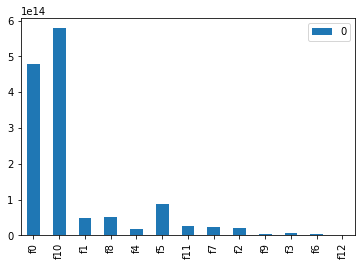

<Figure size 648x576 with 0 Axes>

In [157]:
importance_df.plot.bar()
plt.figure(figsize=(9,8))

In [158]:
print(model.feature_importances_)

[0.35543358 0.03534469 0.01571306 0.00513103 0.01233673 0.06483274
 0.00290801 0.01712985 0.03863442 0.00197372 0.4300182  0.01962786
 0.00091607]


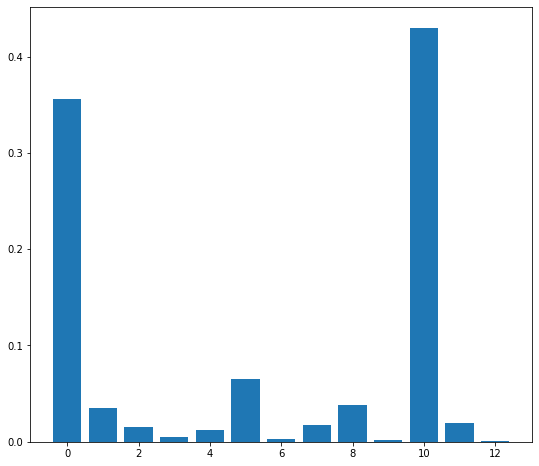

In [159]:
plt.figure(figsize=(9,8))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()


In XG BOOST Model, we got R2 score as **99%**.

Top most important features are  

*   BUILDTYPE_COMMERICAL
*   AREA
*   PARK_FACIL
*   N_ROOM
*   INT_SQFT










## **OUTPUT :**

In [160]:
print('R2 SCORE OF LINEAR REGERSSION ALGORITHM :', metrics.r2_score(y_test,y_pred))
print("R2 SCORE OF  K-NEAREST NEIGHBORS ALGORITHM :",knn.score(X_test_scaled,y_test))
print("R2 SCORE OF DECISION TREE ALGORITHM : {:.2f}".format(rsquared))
print("R2 SCORE OF RANDOM FOREST ALGORITHM :",r2_score(y_test,predictions))
print("R2 SCORE OF Extreme Gradient Boosting ALGORITHM :",model.score(X_test_scaled, y_test) )

R2 SCORE OF LINEAR REGERSSION ALGORITHM : 0.9761475918149882
R2 SCORE OF  K-NEAREST NEIGHBORS ALGORITHM : 0.9546899360793719
R2 SCORE OF DECISION TREE ALGORITHM : 0.98
R2 SCORE OF RANDOM FOREST ALGORITHM : 0.8675130592075435
R2 SCORE OF Extreme Gradient Boosting ALGORITHM : 0.9942640286575609


## **FINALLY WE GOT THE BEST MODEL "EXTREME GRADIENT BOOSTING ALGORITHM"**